# Language-Recognition using ConvNets

_written by Joscha S. Rieber (Fraunhofer IAIS) in 2020_

## Environment

In [1]:
train = 'train'
test = 'test'

eng = 'english'
ger = 'german'

languages = [eng, ger]
categories = [train, test]

dataset_root_path = '../data/'

sample_rate = 8000
image_width = 500
image_height = 128

## Import Libraries

In [2]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio

/data/jrieber/language-recognition-training/conda/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/data/jrieber/language-recognition-training/conda/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


## Helper Functions

### Function for loading the audio file

In [3]:
def load_audio_file(audio_file_path):
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

### Function to repeat the audio segment to a length of 10 seconds

In [4]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*2, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

### Function to generate the mel-scaled spectrogram from the 10-seconds long audio segment

In [5]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec) # ** 2

    # Fix size
    # image = img[:, 0:image_width]

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled

### Function for converting to integer for image storing

In [6]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

### Determine all available audio files

In [7]:
audio_files = {}

for lang in languages:
    for category in categories:
        audio_files[lang + '.' + category] = glob(dataset_root_path + category + '/' + lang + '/*.mp3')

print(audio_files.keys())

dict_keys(['english.train', 'english.test', 'german.train', 'german.test'])


## Example

In [8]:
key = list(audio_files.keys())[0]
audio_file = audio_files[key][0]
audio_file

'../data/train/english/common_voice_en_19591816.mp3'

/data/jrieber/language-recognition-training/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


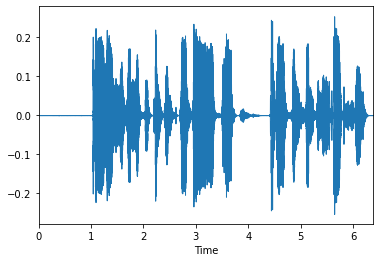

In [9]:
audio = load_audio_file(audio_file)

waveplot(audio, sr=sample_rate)
plt.show()

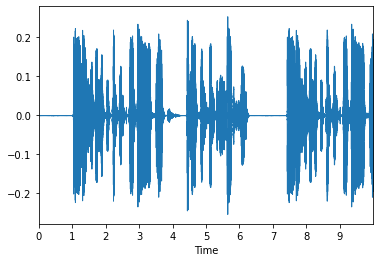

In [10]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

waveplot(audio_fixed, sr=sample_rate)
plt.show()

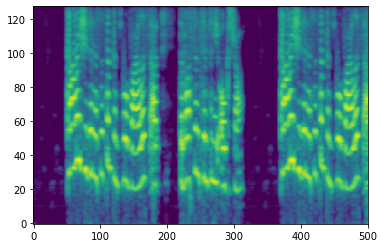

In [11]:
spectro = spectrogram(audio_fixed)

plt.imshow(spectro, origin='lower', aspect='auto')
plt.show()

## Parse all Audio Files

The following script will parse all audio files to extract mel-scaled spectrogram images and store them as PNG

In [12]:
def audio_to_image_file(audio_file):
    out_image_file = audio_file + '.png'
    audio = load_audio_file(audio_file)
    audio_fixed = fix_audio_segment_to_10_seconds(audio)
    spectro = spectrogram(audio_fixed)
    spectro_int = to_integer(spectro)
    imageio.imwrite(out_image_file, spectro_int)

In [13]:
import warnings
warnings.simplefilter('ignore', UserWarning)

error_collector = {}

for lang in languages:
    for category in categories:
        error_collector[lang + '.' + category] = 0
        
        all_audio_files = audio_files[lang + '.' + category]
        
        num_files = len(all_audio_files)
        
        for i in range(num_files):
            if i % (num_files / 50) == 0:
                print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
            audio_to_image_file(all_audio_files[i])

Still processing english train 0/80000
Still processing english train 1600/80000
Still processing english train 3200/80000
Still processing english train 4800/80000
Still processing english train 6400/80000
Still processing english train 8000/80000
Still processing english train 9600/80000
Still processing english train 11200/80000
Still processing english train 12800/80000
Still processing english train 14400/80000
Still processing english train 16000/80000
Still processing english train 17600/80000
Still processing english train 19200/80000
Still processing english train 20800/80000
Still processing english train 22400/80000
Still processing english train 24000/80000
Still processing english train 25600/80000
Still processing english train 27200/80000
Still processing english train 28800/80000
Still processing english train 30400/80000
Still processing english train 32000/80000
Still processing english train 33600/80000
Still processing english train 35200/80000
Still processing engl

## Show an Example Image

This script loads a file from disk and displays it.

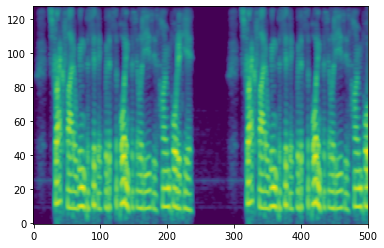

In [14]:
list_of_image_files = glob(dataset_root_path + train + '/' + eng + '/*.png')
image_file_path = list_of_image_files[0]

image = imageio.imread(image_file_path)

plt.imshow(image, origin='lower', aspect='auto')
plt.show()